In [2]:
import pandas as pd
import numpy as np

# Read your Excel file into a Pandas DataFrame
df = pd.read_excel('/home/alifian/Geology Data Analysis/1_Galena Final(1).......xlsx')

# Specify columns to standardize
columns_to_standardize = ['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']

# Calculate the mean and standard deviation of the columns
mean = df[columns_to_standardize].mean()
std = df[columns_to_standardize].std()

# Standardize the columns using the mean and standard deviation
df[columns_to_standardize] = (df[columns_to_standardize] - mean) / std

# Round the values to four decimal places
df = df.round(4)

# Save the result to a new Excel file
df.to_excel('Pyrite_Standarized_data_file_Galena_Paper.xlsx', index=False)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE  # Import t-SNE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')
#df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_18_April (Final Version) New Paper.xlsx')

X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Impute missing values if any
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train your classifier (e.g., Random Forest)
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
rf_classifier.fit(X_train, y_train)

# Validate the model
y_val_pred = rf_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)


Validation Accuracy: 95.62%

Validation Confusion Matrix:
[[19  1  0  0  0  0  1]
 [ 0 87  0  0  1  0  1]
 [ 0  0 50  0  0  0  0]
 [ 0  0  0 43  0  0  0]
 [ 0  1  0  2 65  0  0]
 [ 0  1  0  0  1 26  0]
 [ 0  2  1  0  2  0 16]]

Validation Classification Report:
               precision    recall  f1-score   support

          CRD       1.00      0.90      0.95        21
   Epithermal       0.95      0.98      0.96        89
          MVT       0.98      1.00      0.99        50
Metamorphosed       0.96      1.00      0.98        43
        SEDEX       0.94      0.96      0.95        68
        Skarn       1.00      0.93      0.96        28
         Vein       0.89      0.76      0.82        21

     accuracy                           0.96       320
    macro avg       0.96      0.93      0.94       320
 weighted avg       0.96      0.96      0.96       320

Test Accuracy: 95.62%

Test Confusion Matrix:
[[28  0  0  0  0  0  1]
 [ 0 57  1  0  1  1  1]
 [ 0  0 43  0  0  0  0]
 [ 0  0  0 4

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')
# df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_18_April (Final Version) New Paper.xlsx')

# Select features and target
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Impute missing values if any
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tsne, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': list(range(10, 260, 10)),
    'max_depth': [8, 10, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Validate the model
y_val_pred = best_rf_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Make predictions on the test set
y_test_pred = best_rf_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)


Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=1, min

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.impute import SimpleImputer
import numpy as np

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)  # Apply the imputer to the X DataFrame

# Initialize the Random Forest classifier with specified parameters
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)

# Initialize KFold cross-validator with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
confusion_matrices = []
classification_reports = []

# Perform cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Train the classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = rf_classifier.predict(X_val)

    # Evaluate the model on the validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred, average='weighted')
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    class_report = classification_report(y_val, y_val_pred, output_dict=True)

    # Store metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    confusion_matrices.append(conf_matrix)
    classification_reports.append(class_report)

# Calculate average metrics
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)

# Print the average metrics
print(f'Average Validation Accuracy: {avg_accuracy*100:.2f}%')
print(f'Average Validation Precision: {avg_precision:.2f}')
print('\nConfusion Matrices for each fold:')
for i, conf_matrix in enumerate(confusion_matrices):
    print(f'Fold {i+1}:')
    print(conf_matrix)

print('\nClassification Reports for each fold:')
for i, class_report in enumerate(classification_reports):
    print(f'Fold {i+1}:')
    print(class_report)


Average Validation Accuracy: 97.00%
Average Validation Precision: 0.97

Confusion Matrices for each fold:
Fold 1:
[[15  0  0  0  0  0  0]
 [ 0 30  1  0  1  1  0]
 [ 0  0 31  0  0  0  0]
 [ 0  0  0 24  0  0  0]
 [ 0  1  0  0 30  0  0]
 [ 0  1  0  0  0 17  0]
 [ 0  2  0  0  1  0  5]]
Fold 2:
[[14  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  1]
 [ 0  0 19  0  0  0  0]
 [ 0  0  0 20  0  0  0]
 [ 0  0  0  0 44  0  0]
 [ 0  1  0  0  0 15  0]
 [ 0  0  0  0  0  0 12]]
Fold 3:
[[ 9  1  0  0  0  0  0]
 [ 0 37  1  0  0  0  1]
 [ 0  0 23  0  0  0  0]
 [ 0  0  0 20  0  0  0]
 [ 0  1  0  0 42  0  0]
 [ 0  0  0  0  0 18  0]
 [ 0  1  0  0  0  0  6]]
Fold 4:
[[11  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  0 19  0  0  0]
 [ 0  0  0  1 34  0  0]
 [ 0  1  0  0  1 15  0]
 [ 0  1  0  0  0  0 14]]
Fold 5:
[[15  0  0  0  0  0  0]
 [ 0 33  1  0  0  0  0]
 [ 0  0 34  0  0  0  0]
 [ 0  0  0 28  0  0  0]
 [ 0  0  0  0 24  0  0]
 [ 0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  7]]
Fold 6:
[

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)  # Apply the imputer to the X DataFrame

# Split the data into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest classifier with specified parameters
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation set evaluation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Compute ROC AUC score for validation set
y_val_proba = rf_classifier.predict_proba(X_val)
y_val_bin = label_binarize(y_val, classes=rf_classifier.classes_)
val_auc = roc_auc_score(y_val_bin, y_val_proba, average='macro')

print(f'Validation AUC: {val_auc:.4f}')

# Check if the model is overfitting by comparing validation and test results
# Once the model is finalized after validation, evaluate it on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)

# Compute ROC AUC score for test set
y_test_proba = rf_classifier.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=rf_classifier.classes_)
test_auc = roc_auc_score(y_test_bin, y_test_proba, average='macro')

print(f'Test AUC: {test_auc:.4f}')


Validation Accuracy: 95.62%

Validation Confusion Matrix:
[[19  1  0  0  0  0  1]
 [ 0 87  0  0  1  0  1]
 [ 0  0 50  0  0  0  0]
 [ 0  0  0 43  0  0  0]
 [ 0  1  0  2 65  0  0]
 [ 0  1  0  0  1 26  0]
 [ 0  2  1  0  2  0 16]]

Validation Classification Report:
               precision    recall  f1-score   support

          CRD       1.00      0.90      0.95        21
   Epithermal       0.95      0.98      0.96        89
          MVT       0.98      1.00      0.99        50
Metamorphosed       0.96      1.00      0.98        43
        SEDEX       0.94      0.96      0.95        68
        Skarn       1.00      0.93      0.96        28
         Vein       0.89      0.76      0.82        21

     accuracy                           0.96       320
    macro avg       0.96      0.93      0.94       320
 weighted avg       0.96      0.96      0.96       320

Validation AUC: 0.9989
Test Accuracy: 95.62%

Test Confusion Matrix:
[[28  0  0  0  0  0  1]
 [ 0 57  1  0  1  1  1]
 [ 0  0 43  0

Validation Accuracy: 95.62%

Validation Confusion Matrix:
[[19  1  0  0  0  0  1]
 [ 0 87  0  0  1  0  1]
 [ 0  0 50  0  0  0  0]
 [ 0  0  0 43  0  0  0]
 [ 0  1  0  2 65  0  0]
 [ 0  1  0  0  1 26  0]
 [ 0  2  1  0  2  0 16]]

Validation Classification Report:
               precision    recall  f1-score   support

          CRD       1.00      0.90      0.95        21
   Epithermal       0.95      0.98      0.96        89
          MVT       0.98      1.00      0.99        50
Metamorphosed       0.96      1.00      0.98        43
        SEDEX       0.94      0.96      0.95        68
        Skarn       1.00      0.93      0.96        28
         Vein       0.89      0.76      0.82        21

     accuracy                           0.96       320
    macro avg       0.96      0.93      0.94       320
 weighted avg       0.96      0.96      0.96       320



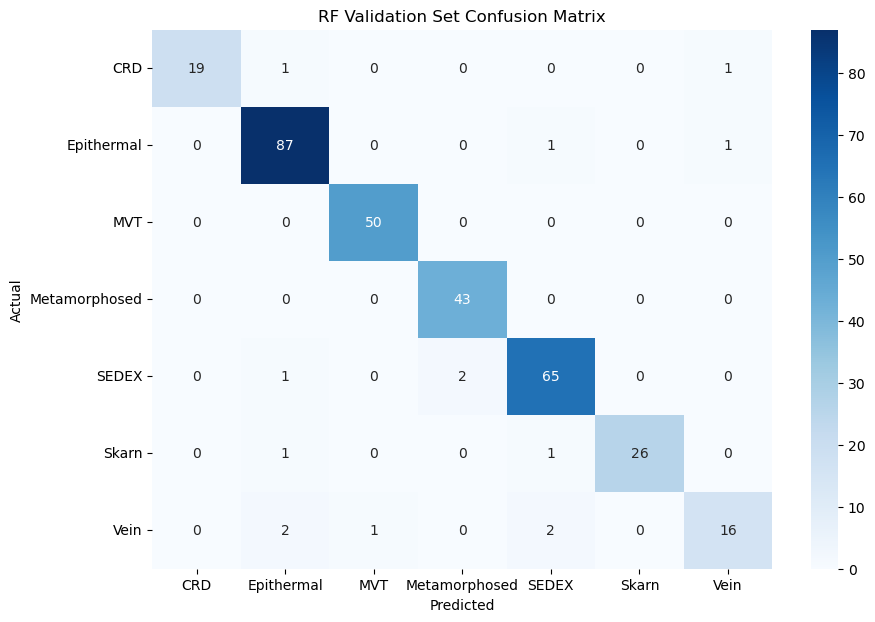

Test Accuracy: 95.62%

Test Confusion Matrix:
[[28  0  0  0  0  0  1]
 [ 0 57  1  0  1  1  1]
 [ 0  0 43  0  0  0  0]
 [ 0  0  0 40  0  0  0]
 [ 0  1  0  2 82  0  0]
 [ 0  1  0  0  2 38  0]
 [ 0  3  0  0  0  0 18]]

Test Classification Report:
               precision    recall  f1-score   support

          CRD       1.00      0.97      0.98        29
   Epithermal       0.92      0.93      0.93        61
          MVT       0.98      1.00      0.99        43
Metamorphosed       0.95      1.00      0.98        40
        SEDEX       0.96      0.96      0.96        85
        Skarn       0.97      0.93      0.95        41
         Vein       0.90      0.86      0.88        21

     accuracy                           0.96       320
    macro avg       0.96      0.95      0.95       320
 weighted avg       0.96      0.96      0.96       320



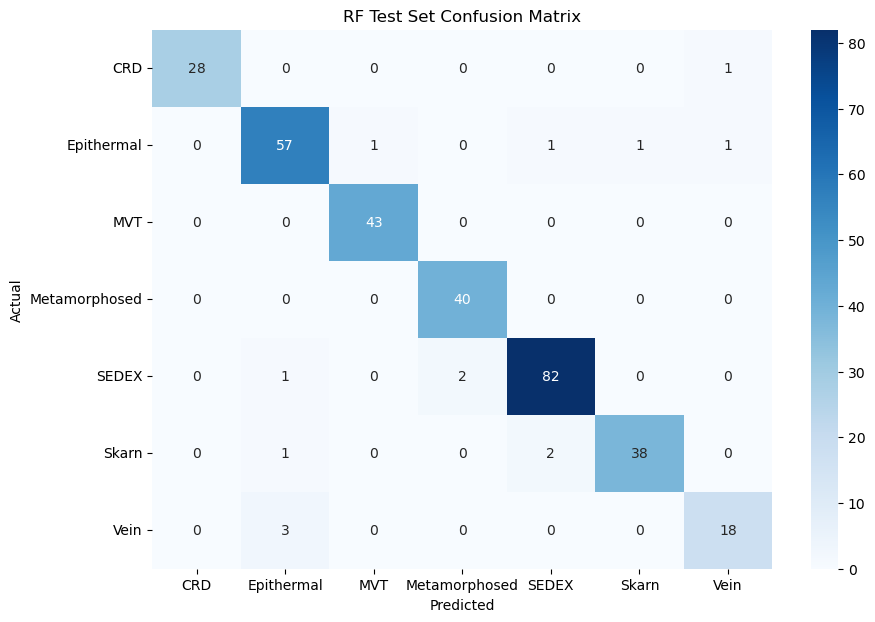

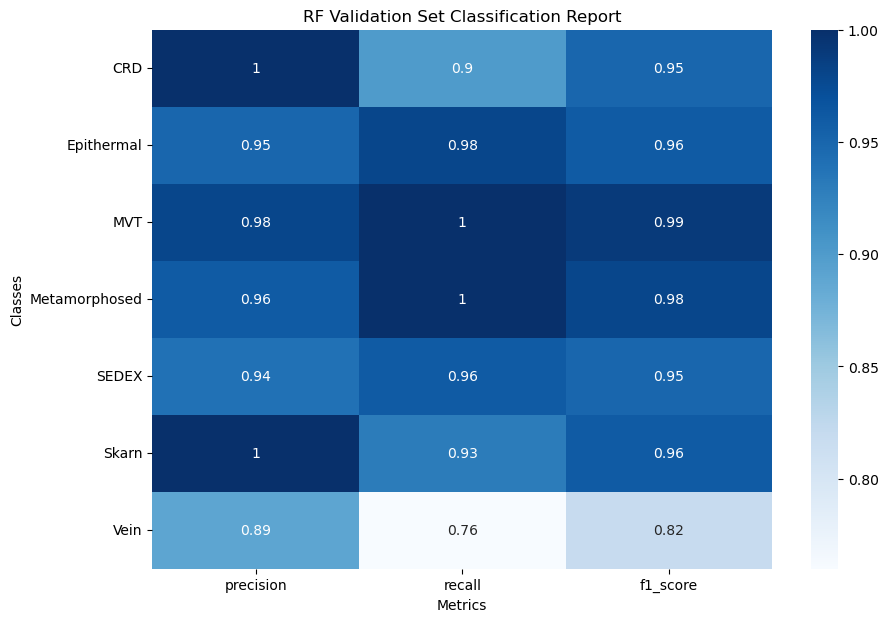

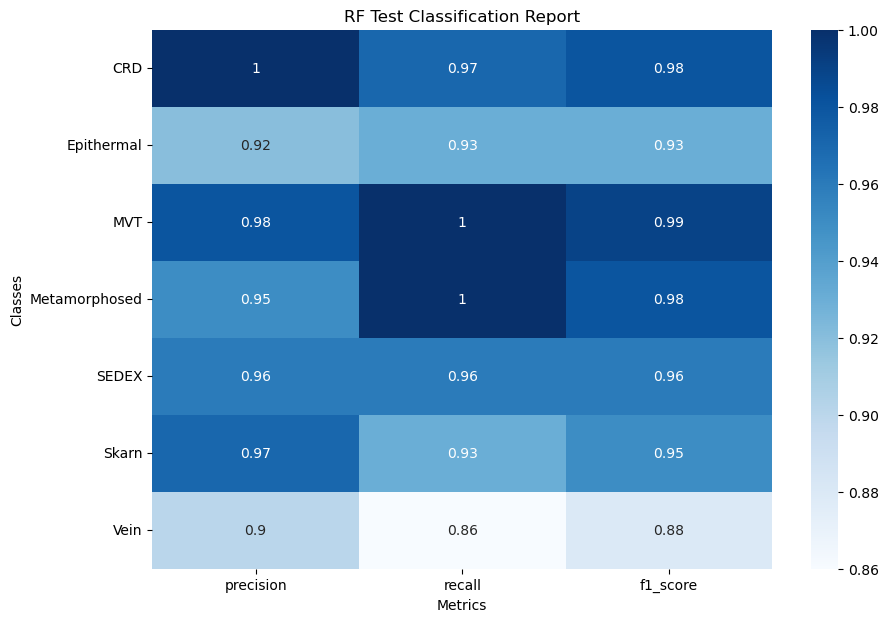

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data from Excel
# df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_23_April (Final Version) New Paper.xlsx')
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Create an imputer object that replaces NaN values with the mean value of the column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)  # Apply the imputer to the X DataFrame

# Split the data into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest classifier with specified parameters
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation set evaluation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Plot confusion matrix heatmap for validation set and save it
plt.figure(figsize=(10, 7))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Validation Set Confusion Matrix')
plt.savefig('/home/alifian/Galena Results/RFvc.png', dpi=1000)
plt.show()

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)

# Plot confusion matrix heatmap for test set and save it
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Test Set Confusion Matrix')
plt.savefig('/home/alifian/Galena Results/RFtc.png', dpi=1000)
plt.show()

def classification_report_to_dataframe(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row_data = line.split()
        if len(row_data) == 5:  # Check if the row has the correct number of columns
            row = {'class': row_data[0], 
                   'precision': float(row_data[1]), 
                   'recall': float(row_data[2]), 
                   'f1_score': float(row_data[3]), 
                   'support': int(row_data[4])}
            report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    return dataframe

val_classification_df = classification_report_to_dataframe(val_classification_rep)
test_classification_df = classification_report_to_dataframe(test_classification_rep)

# Plot classification report heatmap for validation set and save it
plt.figure(figsize=(10, 7))
sns.heatmap(val_classification_df.set_index('class').iloc[:, :-1], annot=True, cmap='Blues')
plt.title('RF Validation Set Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.savefig('/home/alifian/Galena Results/RFvr.png', dpi=1000)
plt.show()

# Plot classification report heatmap for test set and save it
plt.figure(figsize=(10, 7))
sns.heatmap(test_classification_df.set_index('class').iloc[:, :-1], annot=True, cmap='Blues')
plt.title('RF Test Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.savefig('/home/alifian/Galena Results/RFtr.png', dpi=1000)
plt.show()


/tmp/ipykernel_7323/538893590.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=dataframe, palette='viridis')


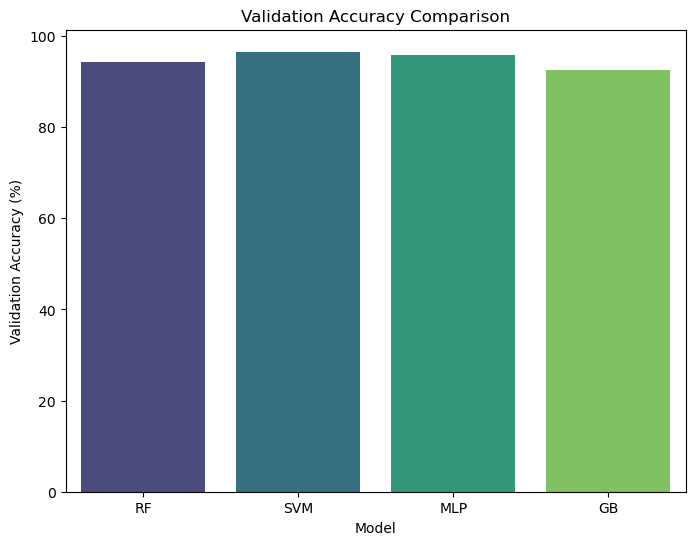

/tmp/ipykernel_7323/538893590.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=dataframe, palette='viridis')


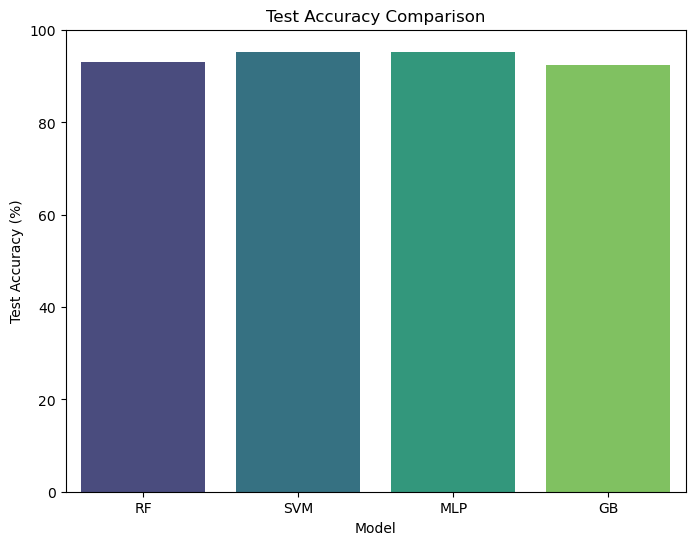

/tmp/ipykernel_7323/538893590.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=dataframe, palette='viridis')


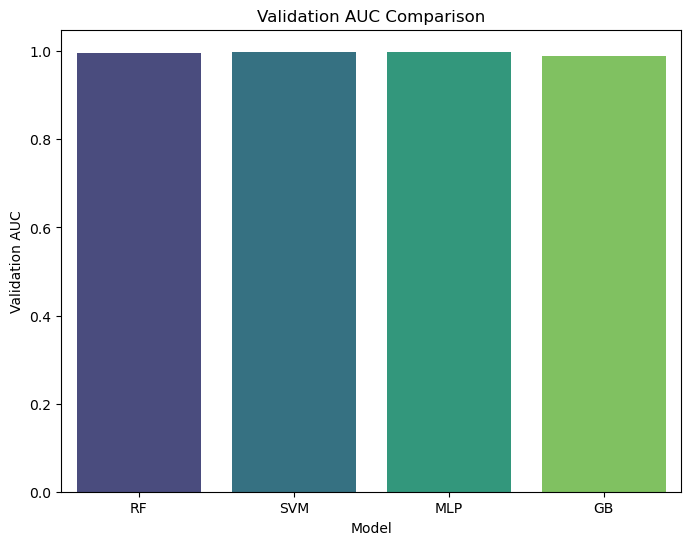

/tmp/ipykernel_7323/538893590.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=dataframe, palette='viridis')


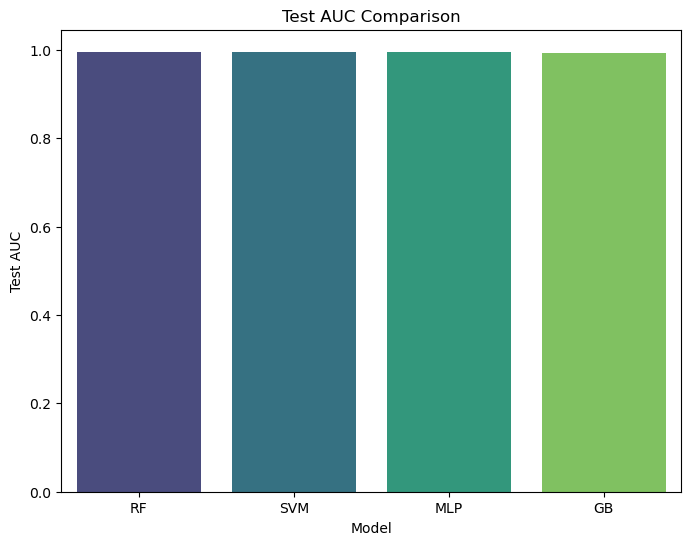

/tmp/ipykernel_7323/538893590.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=dataframe, palette='viridis')


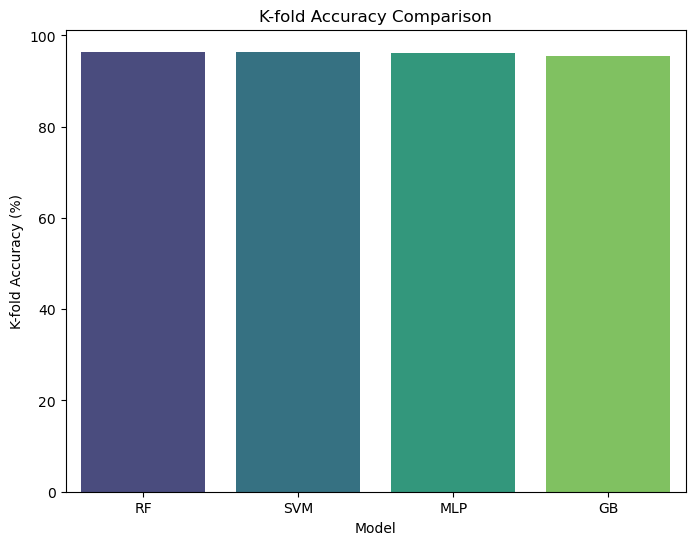

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
data = {
    'Model': ['RF', 'SVM', 'MLP', 'GB'],
    'Validation Accuracy (%)': [94.38, 96.56, 95.94, 92.50],
    'Test Accuracy (%)': [93.12, 95.31, 95.31, 92.50],
    'Validation AUC': [0.9970, 0.9989, 0.9980, 0.9900],
    'Test AUC': [0.9956, 0.9952, 0.9950, 0.9925],
    'K-fold (%)': [96.37, 96.43, 96.24, 95.43]
}

df = pd.DataFrame(data)

# Function to plot and save bar plot
def plot_bar(dataframe, metric, title, ylabel, filename):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Model', y=metric, data=dataframe, palette='viridis')
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel(ylabel)
    plt.savefig(filename, dpi=1000)
    plt.show()

# Plot and save bar plots
plot_bar(df, 'Validation Accuracy (%)', 'Validation Accuracy Comparison', 'Validation Accuracy (%)', '/home/alifian/Galena Results/Validation_Accuracy_Comparison.png')
plot_bar(df, 'Test Accuracy (%)', 'Test Accuracy Comparison', 'Test Accuracy (%)', '/home/alifian/Galena Results/Test_Accuracy_Comparison.png')
plot_bar(df, 'Validation AUC', 'Validation AUC Comparison', 'Validation AUC', '/home/alifian/Galena Results/Validation_AUC_Comparison.png')
plot_bar(df, 'Test AUC', 'Test AUC Comparison', 'Test AUC', '/home/alifian/Galena Results/Test_AUC_Comparison.png')
plot_bar(df, 'K-fold (%)', 'K-fold Accuracy Comparison', 'K-fold Accuracy (%)', '/home/alifian/Galena Results/Kfold_Accuracy_Comparison.png')


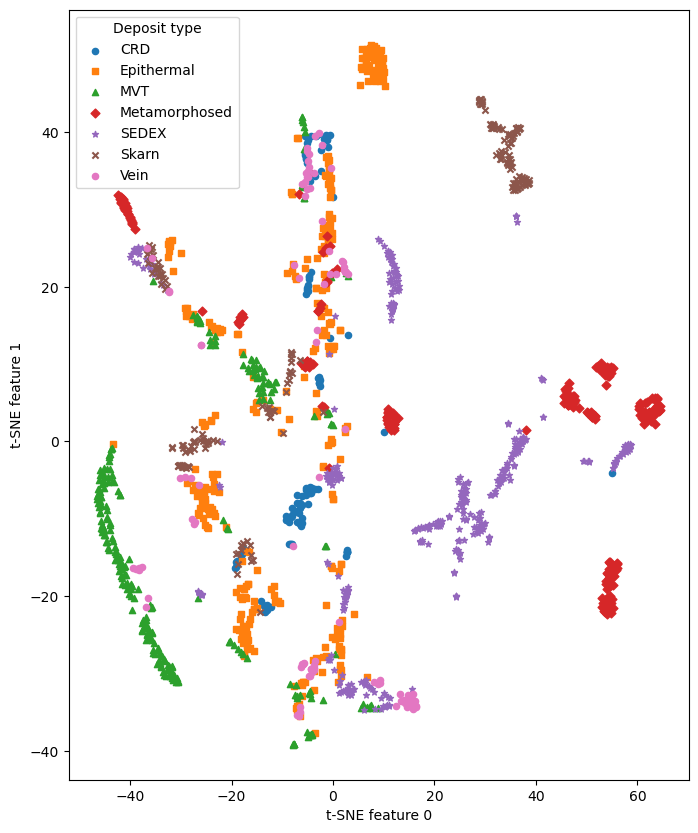

In [9]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load your data
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Features and target selection
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Convert the target variable to categorical type
y = y.astype('category')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_imputed)

# Map the categorical labels to numerical values
y_numeric = y.cat.codes


# Plot 2: t-SNE visualization with different shapes and sizes
plt.figure(figsize=(8, 10))
shapes = ["o", "s", "^", "D", "*", "x"]  # Define different shapes
sizes = [20, 20, 20, 20, 20, 20]  # Define different sizes

for i, label in enumerate(set(y_numeric)):
    plt.scatter(X_tsne[y_numeric == label, 0], X_tsne[y_numeric == label, 1], 
                label=y.cat.categories[label], marker=shapes[i % len(shapes)], s=sizes[i % len(sizes)])

plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')
plt.legend(title='Deposit type')
plt.savefig('/home/alifian/Galena Results/figureg1.jpg', format='jpg', bbox_inches='tight',dpi=1000)
plt.show()


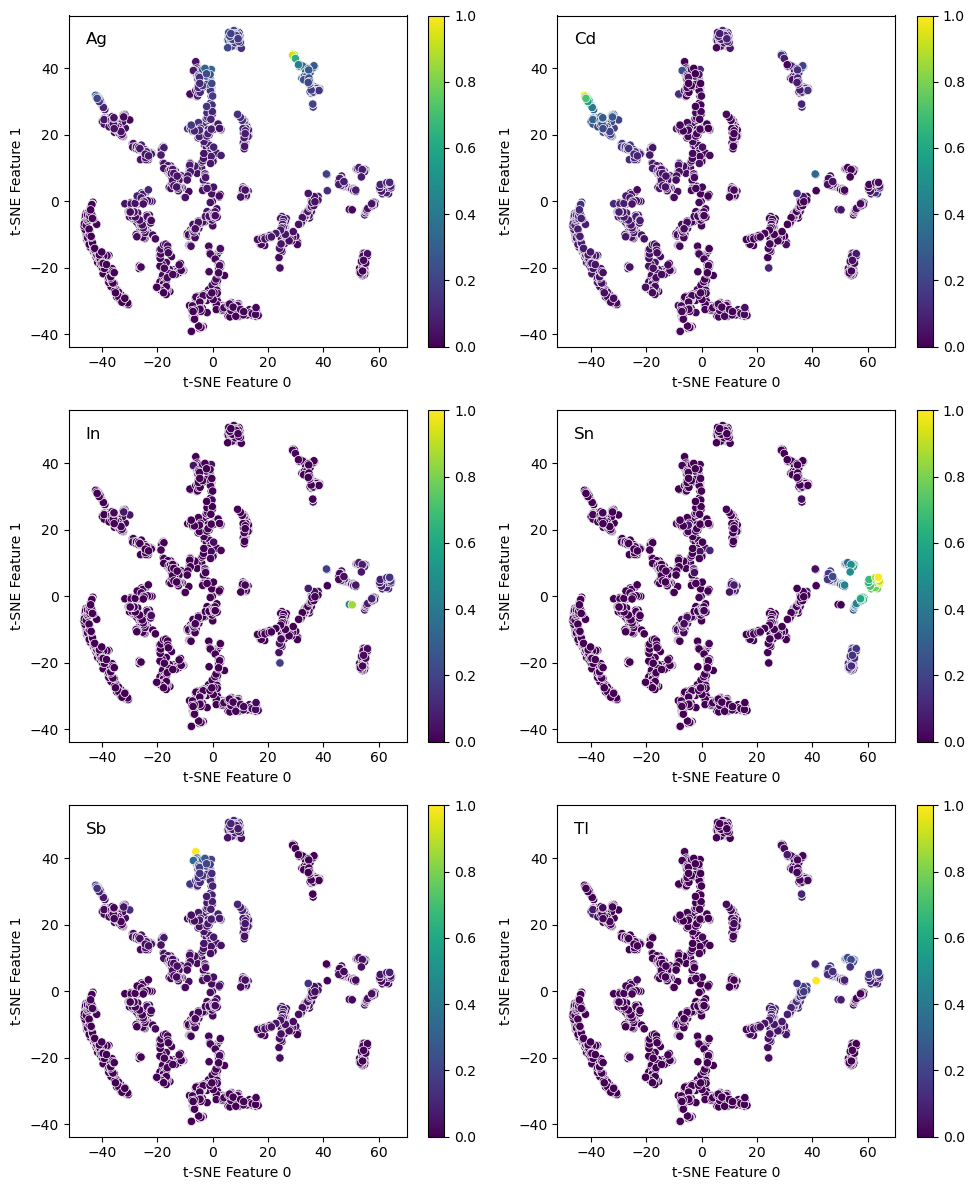

Validation Accuracy: 85.62%

Validation Confusion Matrix:
[[14  0  0  0  0  1  6]
 [ 3 76  2  2  1  3  2]
 [ 0  3 46  0  0  0  1]
 [ 0  5  0 37  1  0  0]
 [ 0  1  0  0 65  2  0]
 [ 1  0  0  0  0 27  0]
 [ 1  5  2  1  3  0  9]]

Validation Classification Report:
               precision    recall  f1-score   support

          CRD       0.74      0.67      0.70        21
   Epithermal       0.84      0.85      0.85        89
          MVT       0.92      0.92      0.92        50
Metamorphosed       0.93      0.86      0.89        43
        SEDEX       0.93      0.96      0.94        68
        Skarn       0.82      0.96      0.89        28
         Vein       0.50      0.43      0.46        21

     accuracy                           0.86       320
    macro avg       0.81      0.81      0.81       320
 weighted avg       0.85      0.86      0.85       320

Test Accuracy: 87.19%

Test Confusion Matrix:
[[24  2  0  0  1  0  2]
 [ 1 47  3  4  1  1  4]
 [ 1  3 38  1  0  0  0]
 [ 0  0  0 4

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a dummy scatter plot to define mappable for colorbar
plt.figure(figsize=(10, 12))
dummy = plt.scatter([], [], c=[], cmap='viridis')
plt.close()

# Plot t-SNE colored by each feature
plt.figure(figsize=(10, 12))
features = ['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    scatter = sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df[feature], palette='viridis', legend=None)
    plt.colorbar(dummy, ax=scatter)  # Add color bar
    plt.xlabel('t-SNE Feature 0')
    plt.ylabel('t-SNE Feature 1')
    plt.text(0.05, 0.95, feature, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.tight_layout()
plt.savefig('/home/alifian/Galena Results/tsne_features_plot.png', format='png', dpi=1000, bbox_inches='tight')
plt.show()

# Split the data into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_tsne, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest classifier with specified parameters
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation set evaluation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Once the model is finalized after validation, evaluate it on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)


Validation Accuracy: 95.62%

Validation Confusion Matrix:
[[19  1  0  0  0  0  1]
 [ 0 87  0  0  1  0  1]
 [ 0  0 50  0  0  0  0]
 [ 0  0  0 43  0  0  0]
 [ 0  1  0  2 65  0  0]
 [ 0  1  0  0  1 26  0]
 [ 0  2  1  0  2  0 16]]

Validation Classification Report:
               precision    recall  f1-score   support

          CRD       1.00      0.90      0.95        21
   Epithermal       0.95      0.98      0.96        89
          MVT       0.98      1.00      0.99        50
Metamorphosed       0.96      1.00      0.98        43
        SEDEX       0.94      0.96      0.95        68
        Skarn       1.00      0.93      0.96        28
         Vein       0.89      0.76      0.82        21

     accuracy                           0.96       320
    macro avg       0.96      0.93      0.94       320
 weighted avg       0.96      0.96      0.96       320

Test Accuracy: 95.62%

Test Confusion Matrix:
[[28  0  0  0  0  0  1]
 [ 0 57  1  0  1  1  1]
 [ 0  0 43  0  0  0  0]
 [ 0  0  0 4

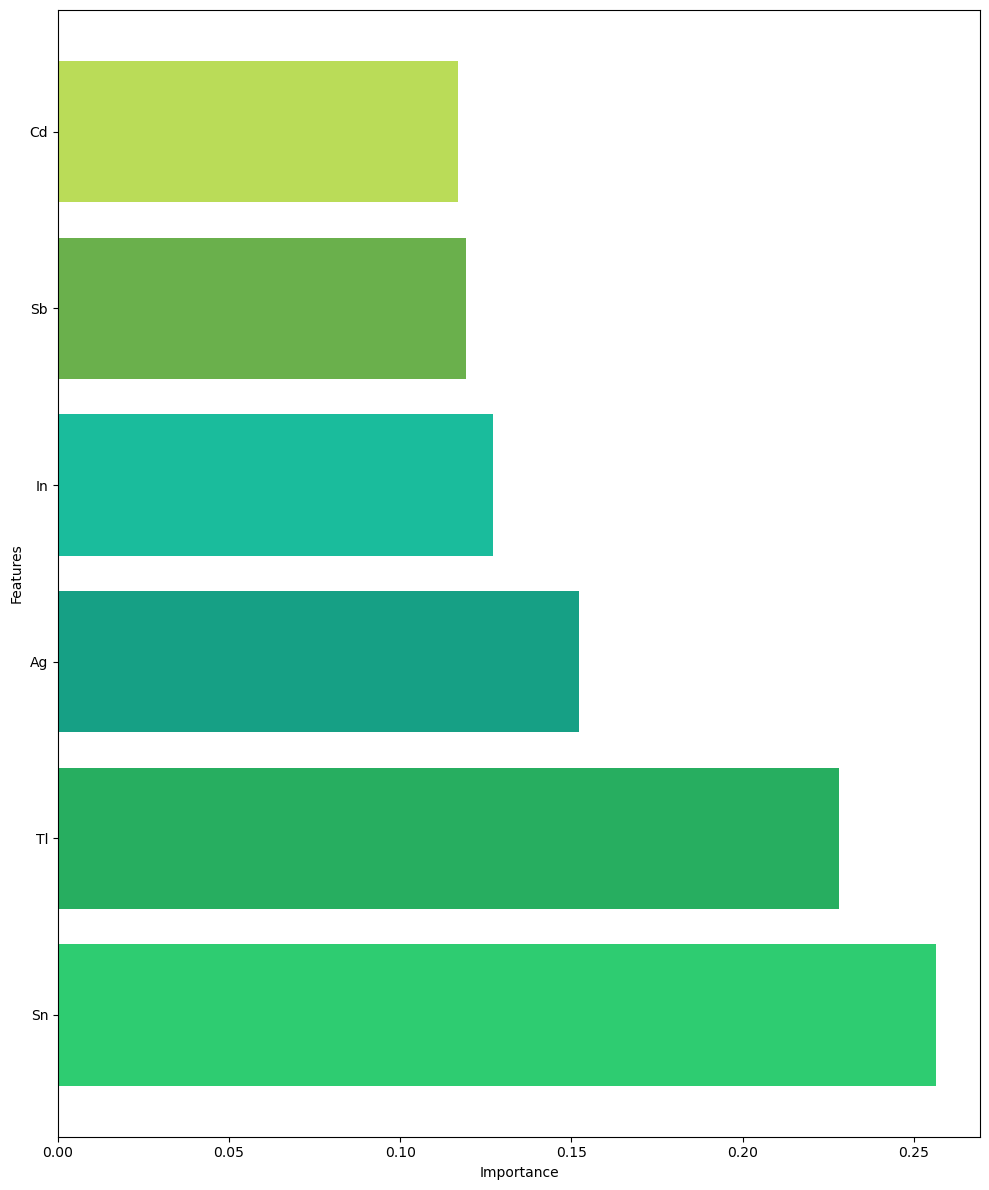

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Store the feature names
feature_names = X.columns

# Impute missing values if any
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Apply t-SNE for dimensionality reduction (if necessary)
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train your classifier (e.g., Random Forest)
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
rf_classifier.fit(X_train, y_train)

# Validate the model
y_val_pred = rf_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)

# Feature Importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names_sorted = np.array(feature_names)[indices]

# Print feature importance
print("Feature Importances:")
for i, idx in enumerate(indices):
    print(f"{feature_names_sorted[i]}: {importances[idx]:.4f}")

# Define a list of colors for each feature
colors = ['#2ecc71', '#27ae60', '#16a085', '#1abc9c', '#6ab04c', '#badc58']



# Plot Feature Importance
plt.figure(figsize=(10, 12))
plt.barh(feature_names_sorted, importances[indices], color=colors, align='center')
plt.xlabel("Importance")
plt.ylabel("Features")
#plt.title("Feature Importance - Random Forest Classifier")
plt.tight_layout()
plt.savefig('/home/alifian/Galena Results/feature_importance_horizontal_colored.png', format='png', dpi=1000, bbox_inches='tight')
plt.show()


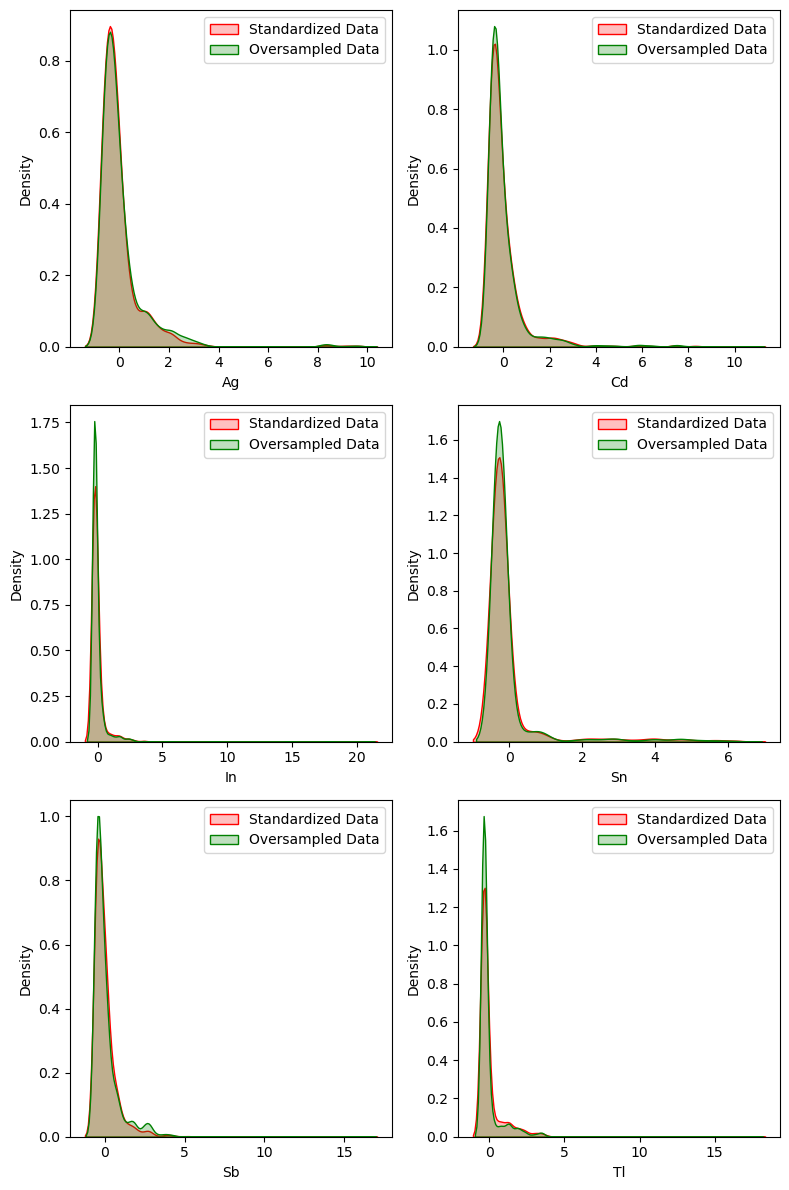

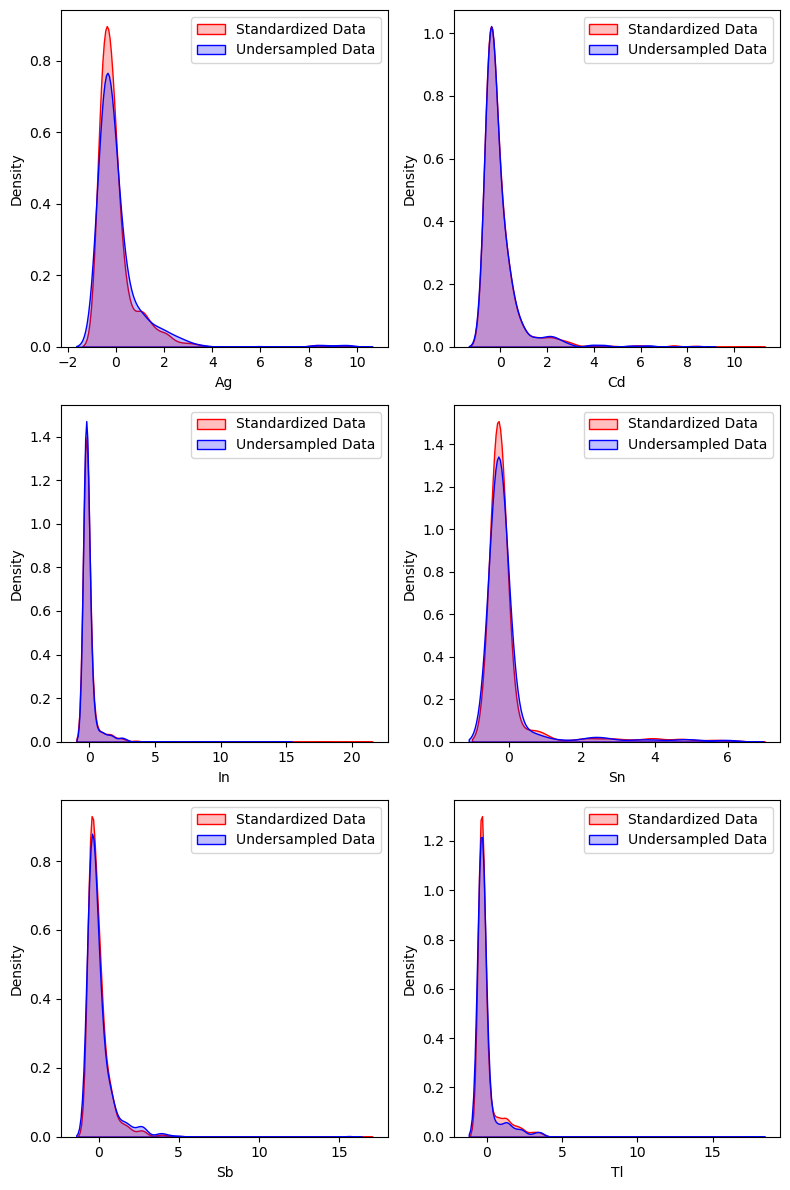

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Load your original and standardized data from Excel
df_original = pd.read_excel('/home/alifian/Geology Data Analysis/1_Galena Final(1).......xlsx')
df_standardized = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Select the same geochemical elements
geochemical_elements = ['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']

# Apply oversampling using SMOTE on standardized data
X_standardized = df_standardized[geochemical_elements]
y_standardized = df_standardized['Deposit Type']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_standardized, y_standardized)

# Apply undersampling using RandomUnderSampler on standardized data
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_standardized, y_standardized)

# Save the oversampled and undersampled data
df_smote = pd.DataFrame(X_smote, columns=geochemical_elements)
df_smote['Deposit Type'] = y_smote
df_smote.to_excel('/home/alifian/Galena Results/Standardized_Data_Oversampled.xlsx', index=False)

df_under = pd.DataFrame(X_under, columns=geochemical_elements)
df_under['Deposit Type'] = y_under
df_under.to_excel('/home/alifian/Galena Results/Standardized_Data_Undersampled.xlsx', index=False)

# Plot and save PDF curves for original vs standardized data
#plt.figure(figsize=(8, 12))
#for i, element in enumerate(geochemical_elements):
    #plt.subplot(3, 2, i+1)
    #sns.kdeplot(df_original[element], fill=True, label='Original Data', color='blue')
    #sns.kdeplot(df_standardized[element], fill=True, label='Standardized Data', color='red')
    #plt.title(f'PDF of {element} (Original vs Standardized)')
    #plt.xlabel(element)
    #plt.ylabel('Density')
    #plt.legend()

#plt.tight_layout()
#plt.savefig('/home/alifian/Galena Results/PDF_Original_vs_Standardized_Data.png', dpi=1000)
#plt.show()

# Plot and save PDF curves for standardized vs oversampled data
plt.figure(figsize=(8, 12))
for i, element in enumerate(geochemical_elements):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(df_standardized[element], fill=True, label='Standardized Data', color='red')
    sns.kdeplot(df_smote[element], fill=True, label='Oversampled Data', color='green')
    #plt.title(f'PDF of {element} (Standardized vs Oversampled)')
    plt.xlabel(element)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.savefig('/home/alifian/Galena Results/PDF_Standardized_vs_Oversampled_Data.png', dpi=1000)
plt.show()

# Plot and save PDF curves for standardized vs undersampled data
plt.figure(figsize=(8, 12))
for i, element in enumerate(geochemical_elements):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(df_standardized[element], fill=True, label='Standardized Data', color='red')
    sns.kdeplot(df_under[element], fill=True, label='Undersampled Data', color='blue')
    #plt.title(f'PDF of {element} (Standardized vs Undersampled)')
    plt.xlabel(element)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.savefig('/home/alifian/Galena Results/PDF_Standardized_vs_Undersampled_Data.png', dpi=1000)
plt.show()


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Impute missing values if any
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)

# Function to evaluate model on validation and test sets
def evaluate_model(X_train, y_train, X_val, y_val, X_test, y_test, technique_name):
    rf_classifier.fit(X_train, y_train)
    
    # Validation set predictions and evaluation
    y_val_pred = rf_classifier.predict(X_val)
    y_val_proba = rf_classifier.predict_proba(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_conf_matrix = confusion_matrix(y_val, y_val_pred)
    val_classification_rep = classification_report(y_val, y_val_pred)
    y_val_bin = label_binarize(y_val, classes=rf_classifier.classes_)
    val_auc = roc_auc_score(y_val_bin, y_val_proba, average='macro')
    
    print(f'\nResults after applying {technique_name} on Validation Set:')
    print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
    print('Validation AUC: {:.4f}'.format(val_auc))
    print('Validation Confusion Matrix:\n', val_conf_matrix)
    print('Validation Classification Report:\n', val_classification_rep)
    
    # Test set predictions and evaluation
    y_test_pred = rf_classifier.predict(X_test)
    y_test_proba = rf_classifier.predict_proba(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_classification_rep = classification_report(y_test, y_test_pred)
    y_test_bin = label_binarize(y_test, classes=rf_classifier.classes_)
    test_auc = roc_auc_score(y_test_bin, y_test_proba, average='macro')
    
    print(f'\nResults after applying {technique_name} on Test Set:')
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')
    print('Test AUC: {:.4f}'.format(test_auc))
    print('Test Confusion Matrix:\n', test_conf_matrix)
    print('Test Classification Report:\n', test_classification_rep)
    print('--------------------------------------------------------')

# 1. Apply SMOTE and evaluate
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
evaluate_model(X_train_smote, y_train_smote, X_val, y_val, X_test, y_test, 'SMOTE')

# 2. Apply RUC (Random Under-Sampling) and evaluate
ruc = RandomUnderSampler(random_state=42)
X_train_ruc, y_train_ruc = ruc.fit_resample(X_train, y_train)
evaluate_model(X_train_ruc, y_train_ruc, X_val, y_val, X_test, y_test, 'Random Under-Sampling (RUC)')

# 3. Evaluate original (no resampling)
evaluate_model(X_train, y_train, X_val, y_val, X_test, y_test, 'Original (No Resampling)')




Results after applying SMOTE on Validation Set:
Validation Accuracy: 95.31%
Validation AUC: 0.9989
Validation Confusion Matrix:
 [[19  1  0  0  0  0  1]
 [ 0 83  1  0  1  2  2]
 [ 0  0 50  0  0  0  0]
 [ 0  0  0 43  0  0  0]
 [ 0  1  0  1 65  1  0]
 [ 0  1  0  0  2 25  0]
 [ 0  1  0  0  0  0 20]]
Validation Classification Report:
                precision    recall  f1-score   support

          CRD       1.00      0.90      0.95        21
   Epithermal       0.95      0.93      0.94        89
          MVT       0.98      1.00      0.99        50
Metamorphosed       0.98      1.00      0.99        43
        SEDEX       0.96      0.96      0.96        68
        Skarn       0.89      0.89      0.89        28
         Vein       0.87      0.95      0.91        21

     accuracy                           0.95       320
    macro avg       0.95      0.95      0.95       320
 weighted avg       0.95      0.95      0.95       320


Results after applying SMOTE on Test Set:
Test Accuracy: 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Identify features (X) and the target variable (y)
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Impute missing values if any
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)

# Function to evaluate model using 10-fold cross-validation
def evaluate_model_kfold(X, y, technique_name):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    val_accuracies = []
    val_aucs = []
    test_accuracies = []
    test_aucs = []
    
    fold = 1
    for train_index, test_index in skf.split(X, y):
        X_train, X_val_test = X[train_index], X[test_index]
        y_train, y_val_test = y[train_index], y[test_index]
        
        # Further split into validation and test sets
        X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)
        
        # Train the model
        rf_classifier.fit(X_train, y_train)
        
        # Validation set predictions and evaluation
        y_val_pred = rf_classifier.predict(X_val)
        y_val_proba = rf_classifier.predict_proba(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        y_val_bin = label_binarize(y_val, classes=rf_classifier.classes_)
        val_auc = roc_auc_score(y_val_bin, y_val_proba, average='macro')
        
        val_accuracies.append(val_accuracy)
        val_aucs.append(val_auc)
        
        # Test set predictions and evaluation
        y_test_pred = rf_classifier.predict(X_test)
        y_test_proba = rf_classifier.predict_proba(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        y_test_bin = label_binarize(y_test, classes=rf_classifier.classes_)
        test_auc = roc_auc_score(y_test_bin, y_test_proba, average='macro')
        
        test_accuracies.append(test_accuracy)
        test_aucs.append(test_auc)
        
        print(f'\nFold {fold} Results after applying {technique_name}:')
        print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
        print('Validation AUC: {:.4f}'.format(val_auc))
        print('Test Accuracy: {:.2f}%'.format(test_accuracy*100))
        print('Test AUC: {:.4f}'.format(test_auc))
        print('--------------------------------------------------------')
        fold += 1
    
    print(f'\nAverage Results after applying {technique_name} across 10 folds:')
    print(f'Average Validation Accuracy: {np.mean(val_accuracies)*100:.2f}%')
    print(f'Average Validation AUC: {np.mean(val_aucs):.4f}')
    print(f'Average Test Accuracy: {np.mean(test_accuracies)*100:.2f}%')
    print(f'Average Test AUC: {np.mean(test_aucs):.4f}')
    print('============================================================')

# 1. Apply SMOTE and evaluate
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
evaluate_model_kfold(X_smote, y_smote, 'SMOTE')

# 2. Apply RUC (Random Under-Sampling) and evaluate
ruc = RandomUnderSampler(random_state=42)
X_ruc, y_ruc = ruc.fit_resample(X, y)
evaluate_model_kfold(X_ruc, y_ruc, 'Random Under-Sampling (RUC)')

# 3. Evaluate original (no resampling)
evaluate_model_kfold(X, y, 'Original (No Resampling)')



Fold 1 Results after applying SMOTE:
Validation Accuracy: 97.64%
Validation AUC: 0.9994
Test Accuracy: 98.43%
Test AUC: 0.9992
--------------------------------------------------------

Fold 2 Results after applying SMOTE:
Validation Accuracy: 97.64%
Validation AUC: 1.0000
Test Accuracy: 98.43%
Test AUC: 1.0000
--------------------------------------------------------

Fold 3 Results after applying SMOTE:
Validation Accuracy: 99.21%
Validation AUC: 1.0000
Test Accuracy: 100.00%
Test AUC: 1.0000
--------------------------------------------------------

Fold 4 Results after applying SMOTE:
Validation Accuracy: 96.85%
Validation AUC: 0.9993
Test Accuracy: 100.00%
Test AUC: 1.0000
--------------------------------------------------------

Fold 5 Results after applying SMOTE:
Validation Accuracy: 99.21%
Validation AUC: 1.0000
Test Accuracy: 98.43%
Test AUC: 0.9993
--------------------------------------------------------

Fold 6 Results after applying SMOTE:
Validation Accuracy: 97.62%
Validat

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your data from Excel
df = pd.read_excel('/home/alifian/Geology Data Analysis/Pyrite_Standarized_data_file_Galena_Paper.xlsx')

# Select features and target
X = df[['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']]
y = df['Deposit Type']

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a dummy scatter plot to define mappable for colorbar
plt.figure(figsize=(10, 12))
dummy = plt.scatter([], [], c=[], cmap='viridis')
plt.close()

# Plot t-SNE colored by each feature
plt.figure(figsize=(10, 12))
features = ['Ag', 'Cd', 'In', 'Sn', 'Sb', 'Tl']
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    scatter = sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df[feature], palette='viridis', legend=None)
    plt.colorbar(dummy, ax=scatter)  # Add color bar
    plt.xlabel('t-SNE Feature 0')
    plt.ylabel('t-SNE Feature 1')
    plt.text(0.05, 0.95, feature, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.tight_layout()
plt.savefig('/home/alifian/Galena Results/tsne_features_plot.png', format='png', dpi=1000, bbox_inches='tight')
plt.show()

# Split the data into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_tsne, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest classifier with specified parameters
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

# Output validation set evaluation metrics
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print('\nValidation Confusion Matrix:')
print(val_conf_matrix)
print('\nValidation Classification Report:')
print(val_classification_rep)

# Once the model is finalized after validation, evaluate it on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Output test set evaluation metrics
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print('\nTest Confusion Matrix:')
print(test_conf_matrix)
print('\nTest Classification Report:')
print(test_classification_rep)
